


Epoch 1/10


938/938 [==============================] - 3s 2ms/step - loss: 0.2271 - accuracy: 0.9344 - val_loss: 0.1136 - val_accuracy: 0.9671
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0908 - accuracy: 0.9731 - val_loss: 0.0916 - val_accuracy: 0.9724
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0578 - accuracy: 0.9829 - val_loss: 0.0753 - val_accuracy: 0.9763
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.0639 - val_accuracy: 0.9801
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0605 - val_accuracy: 0.9820
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0212 - accuracy: 0.9936 - val_loss: 0.0876 - val_accuracy: 0.9745
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0176 - accuracy: 0.9946 - val_loss: 0.0728 - val_accuracy: 0.9792
E

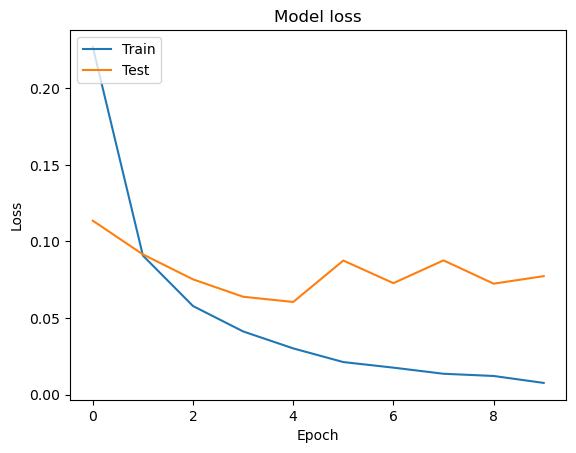

313/313 [==============================] - 0s 993us/step - loss: 0.0774 - accuracy: 0.9802
Test accuracy: 0.9801999926567078


In [2]:
# 參考網站: 
# 1. https://ithelp.ithome.com.tw/articles/10324322

# 前置操作: 安裝 matplotlib庫
#pip install matplotlib

# 引入 NumPy庫並使用 "np" 別名，用於數組和矩陣處理
import numpy as np

# 引入 TensorFlow深度學習框架並使用 "tf" 別名
import tensorflow as tf

# 引入 TensorFlow 的 Keras 模型和層次結構
from tensorflow.keras import layers, models

# 引入手寫數字 MNIST數據集
from tensorflow.keras.datasets import mnist

# 引入將標籤轉換為獨熱編碼的函數
from tensorflow.keras.utils import to_categorical

# Matplotlib函式庫用於繪製折線圖
import matplotlib.pyplot as plt  

# 載入MNIST數據集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 數據預處理

# 圖片形狀調整為(樣本數, 圖像長度, 圖像寬度, 圖像通道數)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 歸一化(Normalization)
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# 標籤轉換
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 建立神經網絡模型

# 創建了一個名為 model 的神經網絡模型
model = models.Sequential()

# 將圖像展平成一維數組
model.add(layers.Flatten(input_shape=(28, 28, 1)))  

# 添加一個具有512個神經元的全連接層
model.add(layers.Dense(512, activation='relu'))  

# 添加一個具有10個神經元的全連接層（用於10個類別的分類）
model.add(layers.Dense(10, activation='softmax'))  

# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
# 參數對應(丟入訓練集images檔, 丟入訓練集labels檔, 訓練次數, 每次訓練的檔案數）
# 使用 validation_data 同時驗證損失
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))  


# 建立 LOSS 圖表
#train loss
plt.plot(history.history['loss'])

#test loss
plt.plot(history.history['val_loss'])

#標題
plt.title('Model loss')

# x軸標籤
plt.xlabel('Epoch')

# y軸標籤
plt.ylabel('Loss')

# 顯示折線的名稱
plt.legend(['Train', 'Test'], loc='upper left')

#顯示折線圖
plt.show()

# 評估模型
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)